Object:
1. Apply Transfer Learning (https://www.tensorflow.org/tutorials/images/transfer_learning)
2. Learn to implement LeNet (https://en.wikipedia.org/wiki/LeNet)
3. Familiarize with Keras Callbacks API (https://keras.io/api/callbacks/) -> ModelCheckpoint, EarlyStopping


## Import tensorflow, keras modules

In [ ]:
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds  # For loading datasets
import numpy as np
import matplotlib.pyplot as plt     # For plotting images
import cv2                          # For resizing images
from keras import Model
import keras

print(tf.version.VERSION)
print(tf.keras.__version__)

2.11.0
2.11.0


In [ ]:
#testing the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Import  MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
# More dataset choices here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# input image dimensions
img_x, img_y, img_z = 28, 28, 1

In [ ]:
# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_images  = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, img_z)

# Normalize input between 0 and 1
# Very important
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Check shapes of train_images, train_labels etc
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


### Visualize the dataset

In [ ]:
# For printing, we name each of the 10 classes below
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

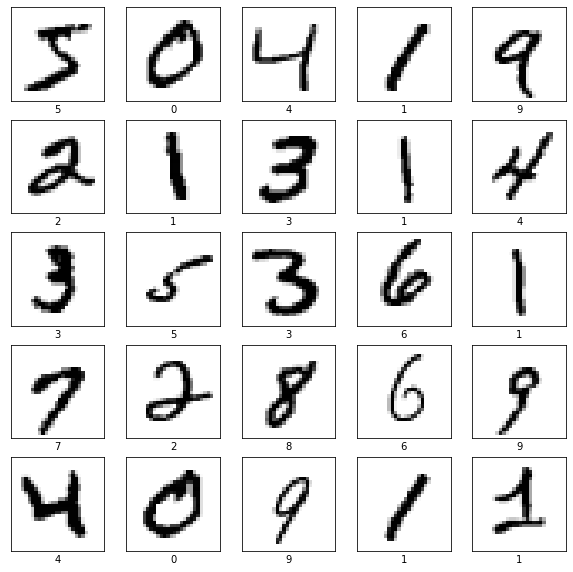

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(img_x, img_y), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])

## (a) Create and train Lenet-5 Using Keras API on MNIST dataset **[3 points]**

In [ ]:
'''
Create a NN with 1 input layer
1 conv2D layer, 6 filters, 5x5 filter size, stride = (1, 1), activation tanh, use padding='same' argument (check it on https://keras.io/api/layers/convolution_layers/convolution2d/ )
1 AveragePooling2D layer (use default arguments in https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D )
1 conv2D layer, 16 Filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
1 AveragePooling2D layer (Default arguements)
1 conv2D layer, 120 filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
Flatten layer
1 Dense layer, 84 units, tanh activation
1 output layer
'''
input_shape = train_images[0].shape
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(28,28,1), name='Input_Layer'))
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),  activation='tanh', padding='same'))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
# Compile the model with appropriate Loss function
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on MNIST dataset
epochs = 5
batch_size = 32
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 20s 6ms/step - loss: 0.2293 - accuracy: 0.9312
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0386 - accuracy: 0.9877


##(b) Check Accuracy on Test Data **[0.5 point]**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9830


In [ ]:
# Try to get 90% or more accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9829999804496765


### Visualize predictions on test data

In [ ]:
# Get all predictions for test data
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


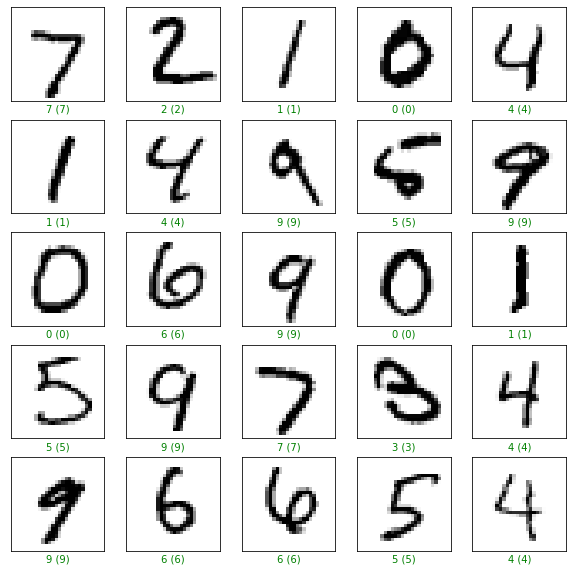

In [ ]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

##(c) Download binary_alpha_digits dataset using tfds, split dataset **[1 point]**

In [ ]:
## write your code here
dataset_name = "binary_alpha_digits"

ds, ds_info = tfds.load(dataset_name, split="train", with_info=True)

def preprocess_example(example):
    image = example["image"]
    label = example["label"]
    return image, label

ds = ds.map(preprocess_example)

ds_images = []
ds_labels = []

# Iterate over the dataset to get the images and labels
for image, label in ds:
    ds_images.append(image)
    ds_labels.append(label)

# Convert the lists of images and labels to numpy arrays
ds_images = np.array(ds_images)
ds_labels = np.array(ds_labels)

In [ ]:
## Split dataset into 20% testing and 80% training
from sklearn.model_selection import train_test_split

test_sizes = 0.2   # fraction of test data
train_images, test_images, train_labels, test_labels = train_test_split(ds_images, ds_labels, test_size = test_sizes, shuffle = True, random_state=42)

# Check training, testing data size
print(train_images.shape)
print(test_images.shape)

(1123, 20, 16, 1)
(281, 20, 16, 1)


### Visualize data

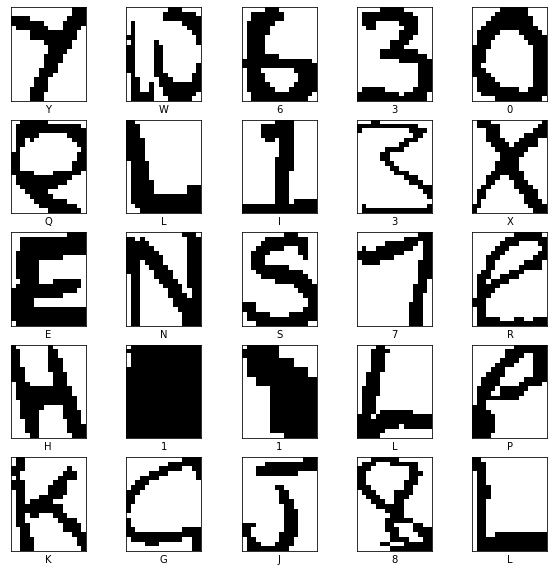

In [ ]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(20, 16), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## (d) Upscale training, testing data to MNIST image size (28, 28, 1) **[2 points]**

In [ ]:
newSize = 28

# create a numpy array for storing upscaled training images
train_upscale = []
for img in train_images:
  resize = cv2.resize(img, (newSize, newSize))
  reshape = resize.reshape(resize.shape[0], resize.shape[1], 1)
  train_upscale.append(reshape)
train_upscale = np.array(train_upscale)
print(train_upscale.shape)

# create a numpy array for storing upscaled testing images
test_upscale = []
for img in test_images:
  resize = cv2.resize(img, (newSize, newSize))
  reshape = resize.reshape(resize.shape[0], resize.shape[1], 1)
  test_upscale.append(reshape)
test_upscale = np.array(test_upscale)
print(test_upscale.shape)

# Normalize input
# train_upscale = train_upscale / 255.0
# test_upscale = test_upscale / 255.0

(1123, 28, 28, 1)
(281, 28, 28, 1)


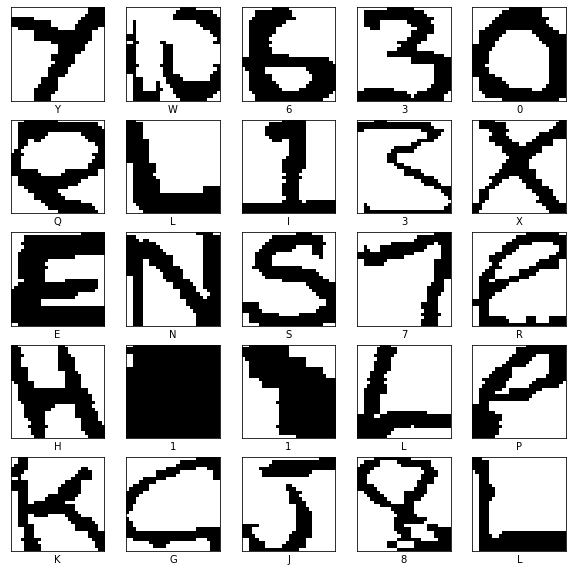

In [ ]:
%matplotlib inline
# Visualize upscaled images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_upscale[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

##(e) Transfer learning-- Remove Last layer from your trained LeNet **[0.5 points]**



In [ ]:
## You can decide whether to train the whole network again or fix layer weights from the MNIST-trained network
## Check link: https://keras.io/getting_started/faq/#how-can-i-freeze-keras-layers 
model.trainable = False

## Code for removing last layer
model.summary()
model.pop()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
# Clone the model used for transfer
model2 = keras.models.clone_model(model)
model2.set_weights(model.get_weights())
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

##(f) Transfer learning-- Add new layers to LeNet **[1.5 points]**


In [ ]:
## Add one or more hidden layer
## Add output layer
model2.add(layers.Dense(2048, activation='relu')) 
model2.add(layers.Dense(36, activation='softmax', name='Output_Layer'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
# Compile the model with appropriate Loss function
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#verify that transferred layers are frozen
for i, layer in enumerate(model2.layers):
    print("Layer {}: {}".format(i, "Frozen" if not layer.trainable else "Trainable"))

Layer 0: Frozen
Layer 1: Frozen
Layer 2: Frozen
Layer 3: Frozen
Layer 4: Frozen
Layer 5: Frozen
Layer 6: Trainable
Layer 7: Trainable


##(g) Train the model and show accuracy on the testing dataset (test_upscale) **[1.5 point]**

In [ ]:
## Your code here
epochs = 16
batch_size = 4
model2.fit(train_upscale, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/16
281/281 [==============================] - 2s 5ms/step - loss: 2.3227 - accuracy: 0.3767
Epoch 2/16
281/281 [==============================] - 1s 3ms/step - loss: 1.0608 - accuracy: 0.6661
Epoch 3/16
281/281 [==============================] - 1s 3ms/step - loss: 0.6129 - accuracy: 0.8023
Epoch 4/16
281/281 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8825
Epoch 5/16
281/281 [==============================] - 1s 3ms/step - loss: 0.2079 - accuracy: 0.9279
Epoch 6/16
281/281 [==============================] - 1s 3ms/step - loss: 0.1681 - accuracy: 0.9484
Epoch 7/16
281/281 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9412
Epoch 8/16
281/281 [==============================] - 1s 3ms/step - loss: 0.1823 - accuracy: 0.9394
Epoch 9/16
281/281 [==============================] - 1s 3ms/step - loss: 0.1845 - accuracy: 0.9368
Epoch 10/16
281/281 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.9252

In [ ]:
# Check Accuracy using Test dataset
test_loss, test_acc = model2.evaluate(test_upscale, test_labels)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 3ms/step - loss: 2.7171 - accuracy: 0.5587
Test accuracy: 0.5587188601493835


9/9 [==============================] - 0s 3ms/step


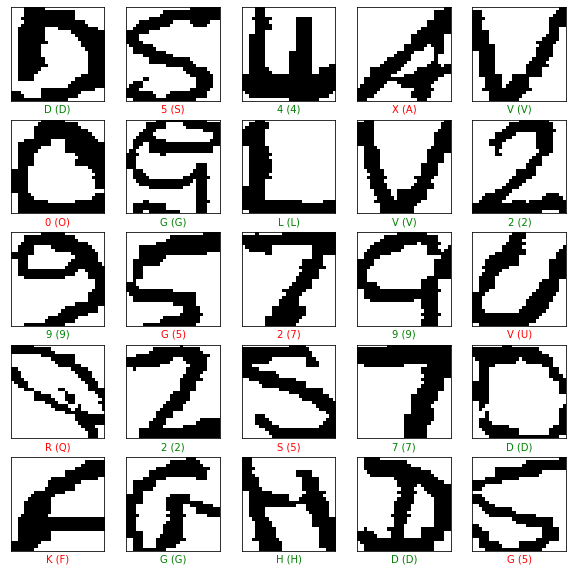

In [ ]:
predictions = model2.predict(test_upscale)
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_upscale[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)